<a href="https://colab.research.google.com/github/hemanth346/EIP4/blob/master/Week2/Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To Do
Create a CNN architecture ```without using Fully Connected layers and Biases``` and build a model that classifies MNIST data with test accuracy of more than 99.4% in less than 20 epochs and with in 15K param

#### Constraints:
- No Fully Connected Layers
- No Biases
- Achieve 99.4% in any epoch
- not more than 20 epochs
- not more than 15K param


#### Summary : 
Approach is to start with very little parameters and add if and when necessary

Model 1:

Started with working on last assignment final network submitted. Using 8 kernels for first layer as that is GPU accelerated and created similar model to that of previous assignment submission
- Not used batch norm or dropout or adaptive learning rate.. 
- Parameters : 4.5k 
- Validation accuracy : 77.3%

Model 2:

Added batch norm and very less dropout of 10%..While training added validation set to every epoch. 

- Dropout is stopped before last 2 conv layers so as not to lose on imp information for classification.
- Parameters : 4.7k 
- Highest val accuracy : 99%

Model 2 (with Learning rate scheduler):
  Trained same model but with learning rate decay.
  - Param : 4.7k
  - Highest Val accuracy - 99.25%

Model 2 (with 128 Batch size):
Increased batch size to see if it can generalize faster.
 - model improved to give 99.31% highest val accuracy

Training accuracy also has not crossed 99.5%, increasing paramters to achieve training accuracy

Model 3:

Changed first Conv block to 16,32 combination kernels to learn more patterns, combined these 32 to get 10 kernels and 2nd Conv block to 10, 20 kernels before classification

- Param -  9,924
- Max. Val accuracy - 99.38
 

Model 4:

Model 3 with 128 batch size

- Param - 9,924
- Max Val Accuracy - 99.34%

*We can observe that learning training and val accuracy are almost similar. It seems model is not training anymore, seems like needs more training or more parameters*

Adding more kernels should increase training accuracy and thereby validation accuracy

Model 5:

Same network as Model 3 changed 2nd Conv block similar to first with 10 channels as output

- Param - 11,100
- Max. Val Accuracy - 99.35%

Adding new param didn't help very much.!

Model 6: 

Reducing dropout percentage to 5% to increase training accuracy for model 3

- *Param - 9,924*
- *Max. Val Accuracy - 99.43%*


## Installs, Imports, Boiler Plate

In [0]:
!pip install -q keras

In [0]:
import warnings
warnings.filterwarnings(action='once')

In [4]:
import keras

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/backend.py:5747: ResourceWarning: unclosed file <_io.TextIOWrapper name='/root/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  ret

In [0]:
import numpy as np
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Dropout, Activation, Flatten, Add

from keras.datasets import mnist

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Load pre-shuffled data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


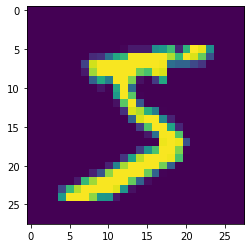

In [7]:
print(X_train.shape)
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # adding channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
# checking class lables
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# converting 1D class labels into 10D class matrices - One hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Function to visulaze 1st layer images after using filters on i/p images for MNIST

**Usage** : `vis_img_in_filter(model, image:'numpy.ndarray', layer_name:'str'='conv2d_1')`

> img is expected from train set and in keras inbuilt mnist data format

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(model, image = X_train[2], 
                      layer_name = 'conv2d_1'):
    img=np.array(image).reshape((1, 28, 28, 1)).astype(np.float64)
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])
      
        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


# Models

In [0]:
model1 = Sequential()
model1.add(Conv2D(8, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x8
model1.add(Conv2D(16, 3, use_bias=False, activation='relu')) #24x16

model1.add(MaxPooling2D(2)) # 12x16
model1.add(Conv2D(8, 1, use_bias=False, activation='relu')) #12X8

model1.add(Conv2D(8, 3, use_bias=False, activation='relu')) #10x8
model1.add(Conv2D(16, 3, use_bias=False, activation='relu')) # 8x16

model1.add(MaxPooling2D(2)) #4x16

model1.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model1.add(MaxPooling2D(2)) #1x10

model1.add(Flatten())
model1.add(Activation('softmax'))
model1.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1152      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 8)         128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 8)         576       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 16)          1152      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)     

In [0]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])


In [0]:
model1.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





60000/60000 [==============================] - 23s 377us/step - loss: 0.8139 - acc: 0.7089
Epoch 2/20
60000/60000 [==============================] - 14s 238us/step - loss: 0.6284 - acc: 0.7586
Epoch 3/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.5878 - acc: 0.7671
Epoch 4/20
60000/60000 [==============================] - 14s 236us/step - loss: 0.5697 - acc: 0.7711
Epoch 5/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.5584 - acc: 0.7730
Epoch 6/20
60000/60000 [==============================] - 14s 233us/step - loss: 0.5500 - acc: 0.7751
Epoch 7/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.5457 - acc: 0.7766
Epoch 8/20
60000/60000 [==============================] - 14s 235us/step - loss: 0.5401 - acc: 0.7775
Epoch 9/20
60000/60000 [==============================] - 14s 233us/step - loss: 0

In [0]:
score = model1.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 95us/step
[0.5448738030910492, 0.7726]


In [0]:
# Failing as we have less than 8 filters
#  vis_img_in_filter(model1, image=X_train[2],layer_name = 'conv2d_1')

In [0]:
model2 = Sequential()
model2.add(Conv2D(8, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Conv2D(16, 3, use_bias=False, activation='relu')) #24x16
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(MaxPooling2D(2)) # 12x16
model2.add(Conv2D(8, 1, use_bias=False, activation='relu')) #12X8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Conv2D(8, 3, use_bias=False, activation='relu')) #10x8
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Conv2D(16, 3, use_bias=False, activation='relu')) # 8x16
model2.add(BatchNormalization())

model2.add(MaxPooling2D(2)) #4x16

model2.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model2.add(MaxPooling2D(2)) #1x10

model2.add(Flatten())
model2.add(Activation('softmax'))
model2.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
___

In [0]:
model2.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 478us/step - loss: 0.3969 - acc: 0.8763 - val_loss: 0.0888 - val_acc: 0.9723
Epoch 2/20
60000/60000 [==============================] - 28s 462us/step - loss: 0.1139 - acc: 0.9648 - val_loss: 0.0560 - val_acc: 0.9814
Epoch 3/20
60000/60000 [==============================] - 28s 459us/step - loss: 0.0860 - acc: 0.9731 - val_loss: 0.0474 - val_acc: 0.9849
Epoch 4/20
60000/60000 [==============================] - 28s 460us/step - loss: 0.0742 - acc: 0.9771 - val_loss: 0.0437 - val_acc: 0.9850
Epoch 5/20
60000/60000 [==============================] - 27s 456us/step - loss: 0.0673 - acc: 0.9785 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 6/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.0595 - acc: 0.9819 - val_loss: 0.0424 - val_acc: 0.9865
Epoch 7/20
60000/60000 [==============================] - 27s 454us/step - loss: 0.0557 - acc: 0.9825 - val_loss: 0.

In [0]:
score = model2.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 95us/step
[0.031555487849854395, 0.9891]


In [0]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 29s 483us/step - loss: 0.0585 - acc: 0.9816 - val_loss: 0.0433 - val_acc: 0.9859
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 28s 466us/step - loss: 0.0471 - acc: 0.9850 - val_loss: 0.0370 - val_acc: 0.9877
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 28s 459us/step - loss: 0.0422 - acc: 0.9865 - val_loss: 0.0278 - val_acc: 0.9903
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 28s 461us/step - loss: 0.0385 - acc: 0.9876 - val_loss: 0.0305 - val_acc: 0.9906
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model2.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 1s 95us/step
[0.024743619471526472, 0.9915]


In [0]:
model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model2.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 180us/step - loss: 0.0297 - acc: 0.9897 - val_loss: 0.0303 - val_acc: 0.9910
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 8s 141us/step - loss: 0.0297 - acc: 0.9903 - val_loss: 0.0289 - val_acc: 0.9909
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 138us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0294 - val_acc: 0.9914
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 8s 140us/step - loss: 0.0254 - acc: 0.9911 - val_loss: 0.0275 - val_acc: 0.9913
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [16]:
model3 = Sequential()
model3.add(Conv2D(16, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x16
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Conv2D(32, 3, use_bias=False, activation='relu')) #24x32
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(MaxPooling2D(2)) # 12x32
model3.add(Conv2D(10, 1, use_bias=False, activation='relu')) #12X10
model3.add(BatchNormalization())
model3.add(Dropout(0.1))

model3.add(Conv2D(10, 3, use_bias=False, activation='relu')) #10x10
model3.add(BatchNormalization())
model3.add(Dropout(0.1))
model3.add(Conv2D(20, 3, use_bias=False, activation='relu')) # 8x20
model3.add(BatchNormalization())

model3.add(MaxPooling2D(2)) #4x20

model3.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model3.add(MaxPooling2D(2)) #1x10

model3.add(Flatten())
model3.add(Activation('softmax'))
model3.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0   

In [18]:
model3.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model3.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 33s 548us/step - loss: 0.1835 - acc: 0.9426 - val_loss: 0.0715 - val_acc: 0.9795
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 28s 463us/step - loss: 0.0689 - acc: 0.9793 - val_loss: 0.0461 - val_acc: 0.9854
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 28s 472us/step - loss: 0.0553 - acc: 0.9830 - val_loss: 0.0402 - val_acc: 0.9878
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 28s 472us/step - loss: 0.0459 - acc: 0.9852 - val_loss: 0.0342 - val_acc: 0.9888
Epoch

In [19]:
model4 = Sequential()
model4.add(Conv2D(16, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x16
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Conv2D(32, 3, use_bias=False, activation='relu')) #24x32
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(MaxPooling2D(2)) # 12x32
model4.add(Conv2D(10, 1, use_bias=False, activation='relu')) #12X10
model4.add(BatchNormalization())
model4.add(Dropout(0.1))

model4.add(Conv2D(10, 3, use_bias=False, activation='relu')) #10x10
model4.add(BatchNormalization())
model4.add(Dropout(0.1))
model4.add(Conv2D(20, 3, use_bias=False, activation='relu')) # 8x20
model4.add(BatchNormalization())

model4.add(MaxPooling2D(2)) #4x20

model4.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model4.add(MaxPooling2D(2)) #1x10

model4.add(Flatten())
model4.add(Activation('softmax'))
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_5 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)       

In [20]:
model4.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model4.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 11s 182us/step - loss: 0.2798 - acc: 0.9136 - val_loss: 0.0621 - val_acc: 0.9810
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 9s 151us/step - loss: 0.0745 - acc: 0.9769 - val_loss: 0.0512 - val_acc: 0.9842
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 9s 150us/step - loss: 0.0566 - acc: 0.9820 - val_loss: 0.0455 - val_acc: 0.9863
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 9s 150us/step - loss: 0.0487 - acc: 0.9850 - val_loss: 0.0384 - val_acc: 0.9867
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [22]:
model5 = Sequential()
model5.add(Conv2D(16, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x16
model5.add(BatchNormalization())
model5.add(Dropout(0.1))
model5.add(Conv2D(32, 3, use_bias=False, activation='relu')) #24x32
model5.add(BatchNormalization())
model5.add(Dropout(0.1))

model5.add(MaxPooling2D(2)) # 12x32
model5.add(Conv2D(16, 1, use_bias=False, activation='relu')) #12X16

model5.add(BatchNormalization())
model5.add(Dropout(0.1))

model5.add(Conv2D(10, 3, use_bias=False, activation='relu')) #10x16
model5.add(BatchNormalization())
model5.add(Dropout(0.1))
model5.add(Conv2D(32, 3, use_bias=False, activation='relu')) # 8x32

model5.add(MaxPooling2D(2)) #4x32
model5.add(Conv2D(10, 1, use_bias=False, activation='relu')) # 4x10

model5.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model5.add(MaxPooling2D(2)) #1x10

model5.add(Flatten())
model5.add(Activation('softmax'))
model5.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_9 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_12 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)       

In [25]:
model5.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model5.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 29s 484us/step - loss: 0.0640 - acc: 0.9800 - val_loss: 0.0407 - val_acc: 0.9872
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 29s 478us/step - loss: 0.0405 - acc: 0.9869 - val_loss: 0.0462 - val_acc: 0.9866
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 29s 482us/step - loss: 0.0325 - acc: 0.9894 - val_loss: 0.0348 - val_acc: 0.9894
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 29s 482us/step - loss: 0.0300 - acc: 0.9908 - val_loss: 0.0299 - val_acc: 0.9909
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

# Final Model

In [26]:
model6 = Sequential()
model6.add(Conv2D(16, 3, use_bias=False, activation='relu', input_shape=(28,28,1)))  #26x16
model6.add(BatchNormalization())
model6.add(Dropout(0.05))
model6.add(Conv2D(32, 3, use_bias=False, activation='relu')) #24x32
model6.add(BatchNormalization())
model6.add(Dropout(0.05))

model6.add(MaxPooling2D(2)) # 12x32
model6.add(Conv2D(10, 1, use_bias=False, activation='relu')) #12X10
model6.add(BatchNormalization())
model6.add(Dropout(0.05))

model6.add(Conv2D(10, 3, use_bias=False, activation='relu')) #10x10
model6.add(BatchNormalization())
model6.add(Dropout(0.05))
model6.add(Conv2D(20, 3, use_bias=False, activation='relu')) # 8x20
model6.add(BatchNormalization())

model6.add(MaxPooling2D(2)) #4x20

model6.add(Conv2D(10, 3, use_bias=False, activation='relu')) # 2x10
model6.add(MaxPooling2D(2)) #1x10

model6.add(Flatten())
model6.add(Activation('softmax'))
model6.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)       

In [28]:
model6.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model6.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 29s 483us/step - loss: 0.0770 - acc: 0.9776 - val_loss: 0.0471 - val_acc: 0.9856
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 29s 487us/step - loss: 0.0403 - acc: 0.9876 - val_loss: 0.0394 - val_acc: 0.9870
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 29s 485us/step - loss: 0.0344 - acc: 0.9889 - val_loss: 0.0368 - val_acc: 0.9892
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 29s 486us/step - loss: 0.0279 - acc: 0.9909 - val_loss: 0.0360 - val_acc: 0.9890
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==